In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Import data

In [10]:
url = 'https://raw.githubusercontent.com/arofiqimaulana/Statistics/master/Linear%20Regression/regresi-data.csv'

In [11]:
df = pd.read_csv(url)

In [12]:
df.head()

,X1.1,X1.2,X1.3,X1.4,X1.5,X1,X2.1,X2.2,X2.3,X2.4,...,X2,Y1.1,Y1.2,Y1.3,Y1.4,Y1.5,Y,RES_1,e2,RES_2
0,4,2,4,4,4,18,4,4,4,4,...,20,3,3,4,2,4,16,-1.040131,1.081873,-3.307081
1,5,4,5,4,4,22,5,5,5,5,...,25,5,5,5,3,4,22,1.673318,2.799993,-1.097339
2,4,5,4,3,1,17,4,3,3,3,...,18,3,3,3,1,1,11,-5.080004,25.806436,21.216757
3,4,5,4,4,5,22,5,3,5,5,...,23,4,5,5,3,3,20,0.042624,0.001817,-4.103035
4,5,4,4,2,4,19,4,4,4,4,...,21,4,4,4,5,4,21,3.184394,10.140368,5.848380


# 2. Pendugaan Parameter (Modeling)

In [13]:
X = df[['X1', 'X2']]
y = df['Y']
model = sm.OLS(y, sm.add_constant(X)).fit()

# 3. Uji Asumsi Klasik

## 3.1 Uji Homoskedastisitas
Kita akan menggunakan uji Breusch Pagan

In [14]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [15]:
_, p_value, _, _ = het_breuschpagan(model.resid, X)

In [16]:
"""
Karena pvalue (9.326813654447332e-06) > alpha (5%) maka asumsi homoskedastisitas terpenuhi
"""
p_value

9.326813654447332e-06

## 3.2 Uji Non-Autokorelasi
kita akan menggunakan uji durbin watson

In [17]:
from statsmodels.stats.stattools import durbin_watson

In [18]:
dw_statistic = durbin_watson(model.resid)

In [19]:
"""
karena dw_statistic berada diantara 1.5 dan 2.5 maka asumsi non-autokorelasi terpenuhi
"""
dw_statistic

2.2589635152651244

## 3.3 Uji Normalitas
Kita akan menggunakan uji kolmogorov smirnov.

In [20]:
from scipy.stats import kstest, norm

In [12]:
ks_statistic, p_value = kstest(model.resid, 'norm')

In [13]:
"""
karena pvalue (0.07) > alpha (0.05) maka asumsi normalitas sisaan terpenuhi
"""
p_value

0.007661037699126738

## 3.4 Uji Non-Multikolinieritas
Kita akan menggunakan VIF

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
# Tambahkan kolom konstanta untuk menghitung VIF
X = sm.add_constant(X)

# Inisialisasi list untuk menyimpan hasil VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [16]:
"""
karena semua nilai VIF < 10 maka asumsi non-multikolinieritas terpenuhi 
"""
vif_data

,Variable,VIF
0,const,51.603337
1,X1,1.531493
2,X2,1.531493


# 4. Goodness of fit

In [17]:
## Uji Simultan
# Uji simultan (F-Test)
f_statistic = model.fvalue
p_value = model.f_pvalue

if p_value < 0.05:
    print("Setidaknya satu variabel independen signifikan secara simultan.")
else:
    print("Tidak ada yang signifikan secara simultan.")

Setidaknya satu variabel independen signifikan secara simultan.


In [18]:
## Uji Parsial
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     37.38
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           4.25e-11
Time:                        00:12:27   Log-Likelihood:                -128.60
No. Observations:                  60   AIC:                             263.2
Df Residuals:                      57   BIC:                             269.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7123      1.963      1.381      0.1

In [19]:
## R-Square
r_square = model.rsquared
print("R-Square:", r_square)

R-Square: 0.5674188566834188


# 5. Cross Validation

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [23]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [24]:
model = lr.fit(X_train, y_train)

In [25]:
predictions = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
print ('RMSE: ', mean_squared_error(y_test, predictions))

RMSE:  4.006508590241532


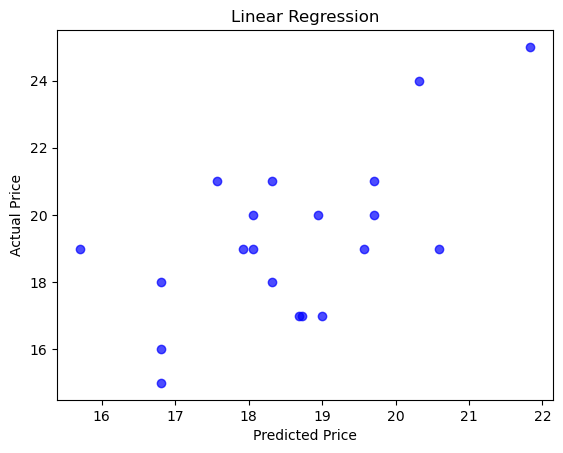

In [27]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression')
plt.show()

In [28]:
# Lakukan 5-Fold cross-validation
scores = cross_val_score(model, X, y, cv=5)

In [29]:
# Cetak skor R^2 dari setiap lipatan
print("R^2 skor dari setiap lipatan:", scores)

# Cetak rata-rata dan standar deviasi dari skor
print("Rata-rata R^2:", scores.mean())
print("Standar Deviasi:", scores.std())

R^2 skor dari setiap lipatan: [ 0.46372916  0.57918405 -1.93114486  0.52579068  0.51299764]
Rata-rata R^2: 0.030111334747412056
Standar Deviasi: 0.9813162903704883


In [31]:
from sklearn.metrics import make_scorer, mean_squared_error

# Gunakan scoring negatif karena MSE adalah metrik loss (semakin rendah semakin baik)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
scores_mse = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

print("MSE dari setiap lipatan:", -scores_mse)  # Negate karena kita menggunakan negative MSE


MSE dari setiap lipatan: [7.90999496 4.45363547 9.01734147 3.56644925 3.55782277]


Dari hasil di atas:

- "Skor R^2 dari setiap lipatan" menunjukkan kinerja model di setiap lipatan validasi silang.
- "Rata-rata R^2" memberikan gambaran umum tentang kinerja rata-rata model di seluruh lipatan.
- "Standar Deviasi" memberikan gambaran tentang seberapa variatif kinerja model di berbagai lipatan.
Jika standar deviasinya kecil, ini berarti model Anda memiliki kinerja yang konsisten di berbagai lipatan. Sebaliknya, standar deviasi yang besar dapat menunjukkan bahwa model mungkin bekerja dengan baik pada beberapa subset data tetapi tidak pada yang lain, menunjukkan potensi overfitting atau ketidakstabilan.